#                                      ICMR Healthcare  Cancer Type Detections  and Gene Type Analysis 

* Data Analyst : Sheri Prashanth Reddy 

## DESCRIPTION

### Problem Statement: 

ICMR wants to analyze different types of cancers, such as breast cancer, renal cancer, colon cancer, lung cancer, and prostate cancer becoming a cause of worry in recent years. They would like to identify the probable cause of these cancers in terms of genes responsible for each cancer type. This would lead us to early identification of each type of cancer reducing the fatality rate.

### Dataset Details: 

The input dataset contains 802 samples for the corresponding 802 people who have been detected with different types of cancer. Each sample contains expression values of more than 20K genes. Samples have one of the types of tumors: BRCA, KIRC, COAD, LUAD, and PRAD.


### Project Tasks are divided in 4 weeks 

## Week 1:-  Exploratory Data Analysis


#### Project Task: Week 1:

Exploratory Data Analysis:

Merge both the datasets.

Plot the merged dataset as a hierarchically-clustered heatmap.

Perform Null-hypothesis testing.
 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

### Week1: Load Data in dataframe for labels and the data 

In [3]:
label = pd.read_csv('dataset/labels.csv',delimiter=',',engine='python')
data = pd.read_csv('dataset/data.csv',delimiter=',',engine='python')
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


### Week1:- Merge data set 

In [3]:
master_data = pd.merge(label,data)
master_data.head()

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
master_data.isnull().sum()

Unnamed: 0    0
Class         0
gene_0        0
gene_1        0
gene_2        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20533, dtype: int64

In [5]:
master_data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


### Week1:- Plot the merged dataset as a hierarchically-clustered heatmap.

In [6]:
heatmap_data = pd.pivot_table(master_data, index=['Class'])
                              
heatmap_data.head()

,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.011362,2.839739,0.544066,10.681488,10.303568,3.258028,7.339461,7.900497,7.489146,7.508378,...,1.969278,5.142237,1.736160,2.312551,1.696127,2.493789,0.046527,2.099709,0.151063,6.954733
COAD,0.022212,3.438381,0.357278,11.015745,9.951124,3.462039,5.526673,7.487396,3.783493,6.959238,...,2.216178,0.354828,1.833606,1.619692,3.839205,2.396207,0.090327,2.298246,0.065007,6.618466
KIRC,0.046544,2.398129,1.166824,10.238999,11.148094,1.651798,6.895752,7.686932,7.269611,7.636246,...,1.824964,0.596508,2.393303,1.872888,1.289448,3.139623,0.130416,2.387948,0.148641,6.429343
LUAD,0.041088,3.358260,0.607541,10.517670,10.503698,3.754181,7.281878,7.041924,6.145042,7.148682,...,2.609490,2.801700,2.738326,1.869805,2.217144,2.459608,0.042070,2.281828,0.056608,6.721517
PRAD,0.026544,3.441041,0.765608,10.282936,9.967433,1.949878,7.946141,8.529695,5.696368,7.396572,...,1.623491,4.594215,1.684084,2.588050,1.703772,3.568490,0.572893,3.621548,0.094953,7.104225


/opt/conda/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


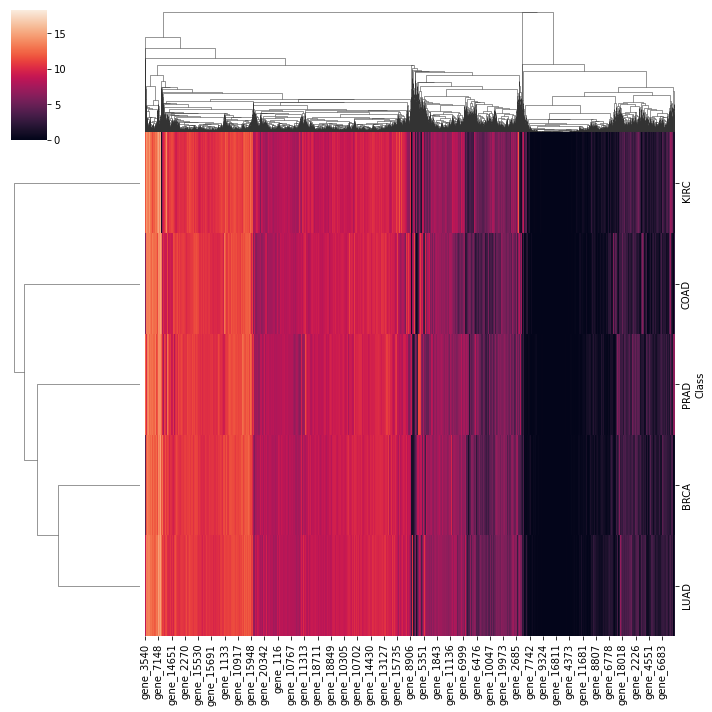

In [7]:
sns.clustermap(heatmap_data)
plt.savefig('heatmap_with_Seaborn_clustermap_python.jpg',
            dpi=150, figsize=(8,12))

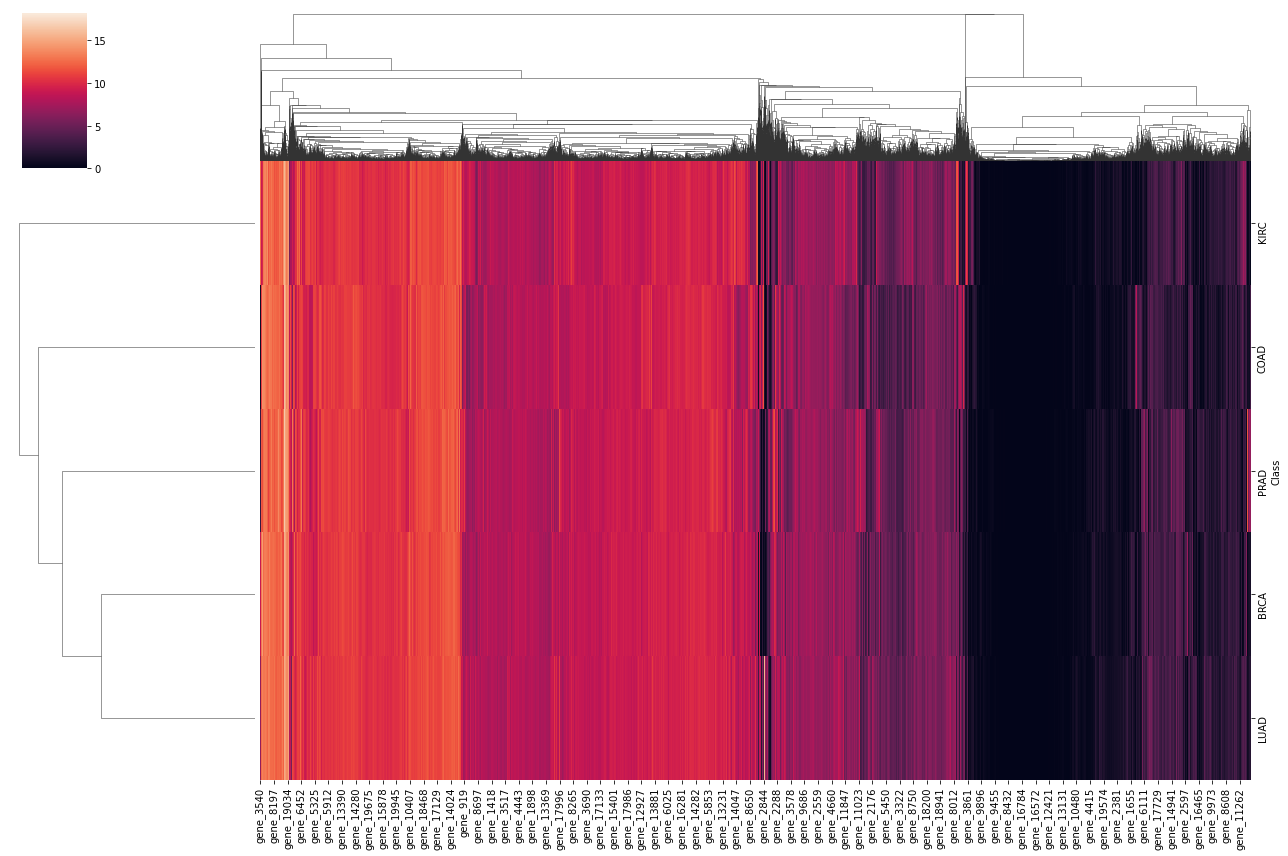

In [8]:
sns.clustermap(heatmap_data, figsize=(18,12))
plt.savefig('clustered_heatmap_with_dendrograms_Seaborn_clustermap_python.jpg',dpi=150)


### Week1:- Perform Null Hypothesis testing 

### Checking histogram to check if the data is normally distributed 

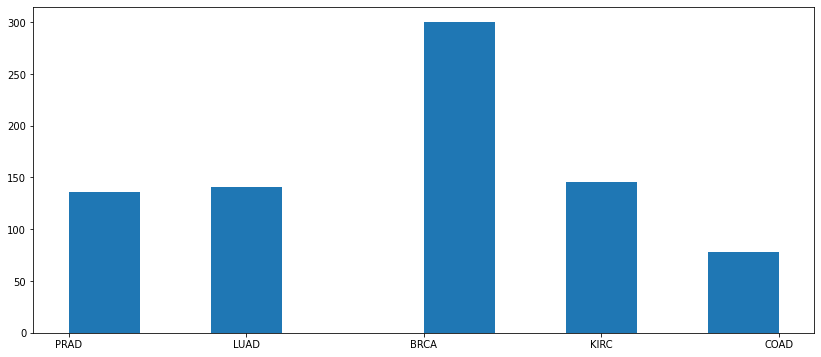

In [9]:
plt.figure(figsize=(14,6))
plt.hist(master_data['Class'])
plt.show()

In [10]:
non_cat_data = master_data.drop(['Unnamed: 0'], axis=1)
non_cat_data

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,BRCA,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,LUAD,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,COAD,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,PRAD,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


### Week1:- F Test

F-tests are named after its test statistic, F, which was named in honor of Sir Ronald Fisher. The F-statistic is simply a ratio of two variances. Variances are a measure of dispersion, or how far the data are scattered from the mean. Larger values represent greater dispersion.

Variance is the square of the standard deviation. For us humans, standard deviations are easier to understand than variances because they’re in the same units as the data rather than squared units. However, many analyses actually use variances in the calculations.

F-statistics are based on the ratio of mean squares. The term “mean squares” may sound confusing but it is simply an estimate of population variance that accounts for the degrees of freedom (DF) used to calculate that estimate.

In [11]:
df_f_test=master_data

In [12]:
def f_test(df_f_test,gene):  
    df_anova = df_f_test[[gene,'Class']]
    grps = pd.unique(df_anova.Class.values)
    grps
    d_data = {grp:df_anova[gene][df_anova.Class == grp] for grp in grps}
    F, p = stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])
    print("p_values:-",p)
    if p<0.05:
        print("reject null hypothesis")
    else:
        print("accept null hypothesis")
        
    return 

In [13]:
f_test(df_f_test,"gene_3")

p_values:- 5.472971016870503e-77
reject null hypothesis


In [14]:
f_test(df_f_test,"gene_7")

p_values:- 0.000573692937547449
reject null hypothesis


In [15]:
f_test(df_f_test,"gene_20524")

p_values:- 9.733071613348129e-129
reject null hypothesis


In [16]:
f_test(df_f_test,"gene_5")

p_values:- nan
accept null hypothesis


/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [17]:
f_test(df_f_test,"gene_5")

p_values:- nan
accept null hypothesis


In [18]:
df_cat_data = master_data
df_cat_data['Class'] = df_cat_data['Class'].map({'PRAD': 1, 'LUAD': 2, 'BRCA': 3, 'KIRC': 4, 'COAD': 5}) 
df_cat_data = df_cat_data.drop(['Unnamed: 0'],axis=1)

### Shapiro test 

#### The null hypothesis for the Shapiro-Wilk test is that a variable is normally distributed in some population. A different way to say the same is that a variable's values are a simple random sample from a normal distribution. As a rule of thumb, we reject the null hypothesis if p < 0.05

In [19]:
from scipy.stats import shapiro
stat, p = shapiro(df_cat_data)
print('stat=%.2f, p=%.30f' %(stat, p))

if p > 0.05:
    print('Normal Distribution')
else:
    print('Not Normal')

stat=0.92, p=0.000000000000000000000000000000
Not Normal


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### k2test - In statistics, D'Agostino's K2 test, named for Ralph D'Agostino, is a goodness-of-fit measure of departure from normality, that is the test aims to establish whether or not the given sample comes from a normally distributed population

In [20]:
#K2 normality test 
from scipy.stats import normaltest
k2_test = df_cat_data['Class']

stat, p = normaltest(k2_test)
print('stat=%.2f, p=%.30f' %(stat, p))

if p > 0.05:
    print('Normal Distribution')
else:
    print('Not Normal')


stat=48.54, p=0.000000000028833417148493984116
Not Normal


## Week 2:- Dimensionality Reduction

#### Project Task: Week 2: 

Dimensionality Reduction:

Each sample has expression values for around 20K genes. However, it may not be necessary to include all 20K genes expression values to analyze each cancer type. Therefore, we will identify a smaller set of attributes which will then be used to fit multiclass classification models. So, the first task targets the dimensionality reduction using various techniques such as,
PCA, LDA, and t-SNE.
Input: Complete dataset including all genes (20531)
Output: Selected Genes from each dimensionality reduction method
 

### Dimensionality Reduction using PCA 

In [21]:
# Define data 
df_pca = master_data.drop(['Unnamed: 0'], axis=1)
df_pca = df_pca.drop(['Class'], axis=1)
df_pca.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [22]:
df_pca.values.shape

(801, 20531)

In [23]:
x_pca = df_pca.values

### Week2:- Scaling the data using standard scaler method

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(x_pca)
X_Scaled

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

### Week2:- Perform PCA with n_components=2

#### Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

#### Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

#### So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.


In [25]:
# Import PCA from sklearn and define the n_components as 2 
from sklearn.decomposition import PCA
pca_with_2=PCA(n_components=2)

In [26]:
#Perform fit transform on the scaled data
X_pca_with_2 = pca_with_2.fit_transform(X_Scaled)
X_pca_with_2.shape

(801, 2)

In [27]:
X_pca_with_2

array([[-57.44698679,  95.41098092],
       [-16.91943037,   0.73247002],
       [-70.34521797, -19.3033266 ],
       ...,
       [ -4.13308814,  15.69001577],
       [-30.81475771,  33.52642215],
       [-22.34455711,   4.05235581]])

In [28]:
# Put the data back on the 2 columns defined 
df_pca = pd.DataFrame(X_pca_with_2)
df_pca.columns = ['pca1','pca2']

# Add the convereted categorical data for 
df_pca['cancer_type']=df_cat_data['Class']
df_pca

,pca1,pca2,cancer_type
0,-57.446987,95.410981,1
1,-16.919430,0.732470,2
2,-70.345218,-19.303327,1
3,-49.161592,-9.227587,1
4,-18.132534,-51.327797,3
...,...,...,...
796,-12.417385,-42.321573,3
797,-29.415553,28.526282,2
798,-4.133088,15.690016,5
799,-30.814758,33.526422,1


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

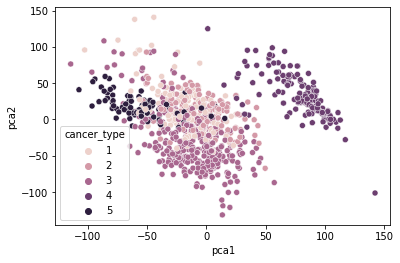

In [29]:
# Present the data on the 5 clusters using seaborn maps 
sns.scatterplot(x='pca1',y='pca2', hue = 'cancer_type',data=df_pca)

### Week2:- PCA with n_components=.995

In [30]:
pca_with_995=PCA(.995)
X_pca_with_995 = pca_with_995.fit_transform(x_pca)
X_pca_with_995.shape
X_pca_with_995

array([[-6.27554152e+01, -9.40719735e+01,  8.95198311e+01, ...,
         3.09258084e+00,  7.13597730e-01, -8.21221710e-02],
       [-2.43289636e+00,  9.05858418e+01, -1.06730787e+00, ...,
         1.39674724e-02, -3.95175744e-01, -9.49947250e-01],
       [-7.12668528e+01, -8.06460774e+00,  6.61124549e+01, ...,
         1.28898532e-01, -2.64530262e-01,  3.84594189e-01],
       ...,
       [ 1.04862615e+01,  2.15705946e+01,  4.13458784e+01, ...,
        -6.47882986e-01, -2.07256774e-01,  1.38942922e-01],
       [-5.50636049e+01, -9.23947780e+01,  8.00500394e+01, ...,
         1.74673062e+00,  2.02232239e+00, -1.92708948e+00],
       [-4.91030338e+01, -5.09976391e+01,  4.05037544e+01, ...,
         1.80367340e+00,  2.22994027e+00, -8.07255452e-01]])

In [31]:
df_pca_995 = pd.DataFrame(X_pca_with_995)
df_pca_995['cancer_type']=df_cat_data['Class']
df_pca_995

,0,1,2,3,4,5,6,7,8,9,...,738,739,740,741,742,743,744,745,746,cancer_type
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-4.081064,-0.626193,-1.265756,-0.017984,-2.740860,0.944037,3.092581,0.713598,-0.082122,1
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,0.215619,-0.593678,-0.403462,1.181537,0.490910,0.197768,0.013967,-0.395176,-0.949947,2
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.263786,0.328453,0.004078,0.363928,-1.109210,0.331488,0.128899,-0.264530,0.384594,1
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,0.381578,0.652455,-3.624900,-1.203028,-2.347912,1.577992,-0.781748,0.120442,-0.057973,1
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,1.488047,2.767486,-0.631562,-0.794275,-0.514008,-1.875969,-2.526109,-1.073803,-1.161728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-60.861882,-22.278633,-80.927167,42.670292,7.843763,-4.545218,-27.602910,-8.840676,-31.531870,6.380236,...,-0.780676,0.105227,-2.001001,1.579115,0.955344,0.085881,2.667448,0.632850,0.023523,3
797,-14.465433,53.392194,38.153904,-63.217345,22.799082,39.543441,-47.899401,39.925172,-12.413483,43.364820,...,-0.712822,0.624739,-0.162403,-0.238540,0.584705,1.404867,0.564251,-0.054682,-0.905574,2
798,10.486261,21.570595,41.345878,-59.639929,-2.163066,-96.453878,38.375897,46.997294,60.604643,59.967025,...,0.269628,-0.348648,-0.531710,0.055553,0.220559,0.331122,-0.647883,-0.207257,0.138943,5
799,-55.063605,-92.394778,80.050039,-7.782015,15.180574,2.563620,8.487660,10.571657,11.710577,1.304005,...,0.045885,-2.222754,-4.115667,-0.064646,-0.447662,-0.243658,1.746731,2.022322,-1.927089,1


<AxesSubplot:xlabel='0', ylabel='1'>

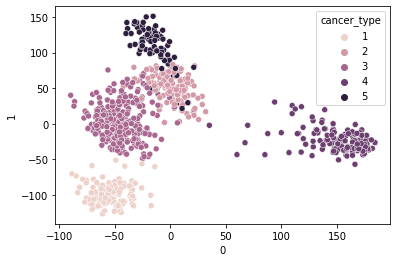

In [32]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=df_pca_995)

### Week2:- Dimensionality reduction using  TSNE

T-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.



In [33]:
df_tsne_data = master_data
non_numeric = ['Unnamed: 0','Class']
df_tsne_data = df_tsne_data.drop(non_numeric, axis=1)
df_tsne_data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [34]:
#import T-SNE from sklearn
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)

In [35]:
tnse_features = m.fit_transform(df_tsne_data)
tnse_features[1:4,:]

array([[-19.795588 ,  24.284504 ],
       [ 48.298653 ,  -1.4586223],
       [ 47.529713 ,  -1.1015767]], dtype=float32)

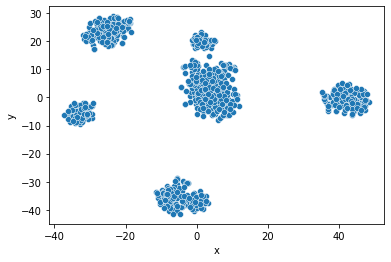

In [36]:
df_tsne_data['x'] = tnse_features[:,0]
df_tsne_data['y'] = tnse_features[:,1]

import seaborn as sns
sns.scatterplot(x='x',y='y',data=df_tsne_data)
plt.show()

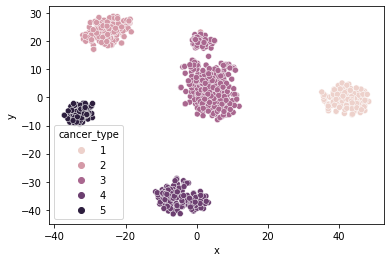

In [37]:
df_tsne_data['cancer_type']=df_cat_data['Class']
sns.scatterplot(x='x',y='y',hue = 'cancer_type', data=df_tsne_data)
plt.show()

### Week2:- Dimensionality reduction using LDA 

#### Linear Discriminant Analysis, or LDA for short, is a predictive modeling algorithm for multi-class classification. It can also be used as a dimensionality reduction technique, providing a projection of a training dataset that best separates the examples by their assigned class.

#### The ability to use Linear Discriminant Analysis for dimensionality reduction often surprises most practitioners.

In [38]:
df_lda = master_data.drop(['Unnamed: 0'], axis=1)
df_lda = df_lda.drop(['Class'], axis=1)
x_lda = df_lda
x_lda

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [39]:
x_lda.shape

(801, 20531)

In [40]:
y_lda = master_data['Class']
y_lda.values

array([1, 2, 1, 1, 3, 1, 4, 1, 3, 1, 3, 4, 1, 3, 3, 3, 2, 4, 4, 1, 3, 4,
       2, 3, 4, 2, 5, 3, 3, 3, 3, 3, 4, 3, 1, 3, 4, 2, 3, 3, 4, 1, 1, 4,
       4, 3, 1, 5, 3, 2, 3, 2, 3, 1, 5, 3, 3, 5, 4, 3, 2, 4, 3, 2, 1, 5,
       3, 1, 4, 3, 4, 3, 3, 2, 3, 2, 3, 4, 1, 5, 3, 1, 3, 3, 1, 1, 3, 3,
       4, 3, 1, 1, 3, 3, 3, 1, 5, 3, 1, 3, 3, 4, 3, 4, 2, 4, 2, 5, 2, 2,
       1, 3, 2, 1, 3, 4, 4, 4, 3, 3, 2, 4, 2, 3, 1, 1, 1, 3, 4, 2, 5, 3,
       5, 3, 3, 4, 2, 3, 4, 5, 3, 1, 3, 4, 2, 5, 1, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 1, 1, 2, 1, 2, 4, 3, 1, 2, 5, 4, 2, 3, 4, 2, 3, 2, 3, 3,
       3, 1, 3, 4, 5, 4, 3, 1, 1, 1, 2, 2, 3, 2, 2, 4, 2, 1, 2, 3, 3, 3,
       2, 2, 3, 4, 4, 4, 4, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 3, 3, 3, 2, 3,
       4, 2, 4, 4, 2, 3, 4, 1, 3, 2, 2, 1, 5, 3, 4, 1, 4, 5, 3, 4, 4, 2,
       1, 1, 2, 2, 4, 3, 3, 5, 3, 1, 5, 3, 1, 4, 1, 1, 1, 3, 5, 5, 2, 5,
       5, 1, 2, 3, 3, 4, 4, 3, 5, 1, 4, 1, 3, 3, 4, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 2, 1, 3,

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
x_r2 = lda.fit(x_lda,y_lda).transform(x_lda)

In [42]:
lda.explained_variance_ratio_

array([0.36219022, 0.30156109])

In [43]:
x_r3 = pd.DataFrame(data=x_r2)
x_r3['y']=y_lda
x_r3

,0,1,y
0,-7.958125,10.922818,1
1,-0.301563,-2.780898,2
2,-6.424952,8.870978,1
3,-6.934259,10.417199,1
4,-2.872004,-4.912284,3
...,...,...,...
796,-2.491183,-6.516482,3
797,0.217789,-1.859410,2
798,-1.426674,-0.474514,5
799,-7.800641,12.104337,1


<AxesSubplot:xlabel='0', ylabel='1'>

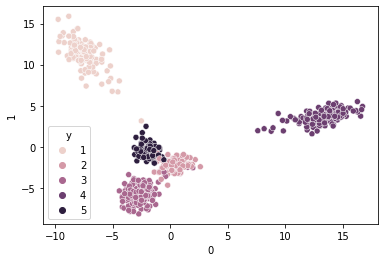

In [44]:
sns.scatterplot(x=0,y=1,hue = 'y', data=x_r3)

## Project Task: Week 3: Clustering Genes and Samples:

#### Project Task: Week 3: 

Clustering Genes and Samples:

Our next goal is to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g., k-means, hierarchical, and mean-shift clustering, on genes and samples.

 

First, apply the given clustering technique on all genes to identify:

Genes whose expression values are similar across all samples

Genes whose expression values are similar across samples of each cancer type 

 

Next, apply the given clustering technique on all samples to identify:

Samples of the same class (cancer type) which also correspond to the same cluster

Samples identified to be belonging to another cluster but also to the same class (cancer type)

 


### KMEANS Clustering with PCA = 2

In [45]:
from sklearn.cluster import KMeans
clusters = KMeans(5, n_init = 5)
clusters.fit(X_pca_with_2)

clusters.labels_

array([4, 3, 0, 0, 2, 3, 1, 3, 2, 0, 3, 1, 3, 4, 2, 2, 3, 1, 1, 0, 2, 3,
       3, 0, 1, 3, 0, 2, 3, 2, 2, 2, 1, 4, 0, 2, 1, 3, 3, 4, 1, 0, 3, 1,
       1, 2, 4, 0, 2, 3, 2, 0, 2, 3, 0, 0, 2, 0, 1, 3, 3, 3, 2, 3, 0, 0,
       3, 0, 1, 0, 1, 3, 0, 3, 2, 0, 2, 4, 3, 0, 2, 3, 2, 2, 4, 3, 2, 0,
       1, 0, 0, 0, 2, 4, 2, 0, 0, 2, 2, 3, 2, 1, 2, 1, 3, 1, 0, 0, 0, 2,
       4, 2, 3, 3, 2, 1, 1, 1, 2, 2, 3, 1, 3, 0, 3, 3, 0, 2, 1, 0, 0, 0,
       4, 3, 2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 3, 0, 4, 2, 3, 0, 3, 3, 2, 2,
       3, 3, 2, 3, 0, 3, 4, 3, 1, 3, 3, 3, 0, 1, 3, 2, 1, 3, 2, 0, 2, 0,
       3, 3, 2, 1, 0, 1, 2, 3, 0, 3, 3, 3, 2, 3, 3, 1, 4, 2, 3, 2, 4, 2,
       0, 3, 2, 1, 1, 1, 1, 2, 4, 0, 3, 3, 3, 2, 3, 0, 3, 2, 2, 2, 3, 3,
       1, 3, 1, 1, 3, 2, 1, 0, 2, 3, 4, 2, 0, 4, 1, 3, 1, 0, 3, 1, 1, 2,
       0, 3, 3, 3, 1, 2, 2, 0, 2, 0, 3, 2, 3, 1, 4, 3, 3, 2, 3, 0, 2, 0,
       0, 0, 2, 0, 2, 1, 1, 2, 0, 4, 1, 3, 2, 2, 1, 2, 2, 2, 4, 3, 3, 2,
       2, 2, 1, 1, 1, 1, 4, 2, 2, 1, 2, 2, 3, 3, 3,

In [46]:
pca_with_2_data_frame = pd.DataFrame(data=X_pca_with_2,columns=['pca1','pca2'])
pca_with_2_data_frame.head()

,pca1,pca2
0,-57.446987,95.410981
1,-16.919430,0.732470
2,-70.345218,-19.303327
3,-49.161592,-9.227587
4,-18.132534,-51.327797


In [47]:
pca_with_2_data_frame['Cls_label'] = clusters.labels_
pca_with_2_data_frame['given_cancer_type'] = label.Class.values
pca_with_2_data_frame

,pca1,pca2,Cls_label,given_cancer_type
0,-57.446987,95.410981,4,PRAD
1,-16.919430,0.732470,3,LUAD
2,-70.345218,-19.303327,0,PRAD
3,-49.161592,-9.227587,0,PRAD
4,-18.132534,-51.327797,2,BRCA
...,...,...,...,...
796,-12.417385,-42.321573,2,BRCA
797,-29.415553,28.526282,0,LUAD
798,-4.133088,15.690016,3,COAD
799,-30.814758,33.526422,0,PRAD


In [48]:
brca = pca_with_2_data_frame.groupby('given_cancer_type').get_group('BRCA')
brca.Cls_label.value_counts()

2    202
3     44
0     35
4     19
Name: Cls_label, dtype: int64

In [49]:
luad = pca_with_2_data_frame.groupby('given_cancer_type').get_group('LUAD')
luad.Cls_label.value_counts()

3    99
0    23
2    13
4     5
1     1
Name: Cls_label, dtype: int64

In [50]:
coad = pca_with_2_data_frame.groupby('given_cancer_type').get_group('COAD')
coad.Cls_label.value_counts()

0    61
4     9
3     8
Name: Cls_label, dtype: int64

In [51]:
prad = pca_with_2_data_frame.groupby('given_cancer_type').get_group('PRAD')
prad.Cls_label.value_counts()

3    60
0    46
2    17
4    13
Name: Cls_label, dtype: int64

In [52]:
kirc = pca_with_2_data_frame.groupby('given_cancer_type').get_group('KIRC')
kirc.Cls_label.value_counts()

1    138
3      7
4      1
Name: Cls_label, dtype: int64

In [53]:
clusters.cluster_centers_

array([[-45.2036914 ,  15.07808384],
       [ 80.93171913,  32.80898513],
       [ -2.18176324, -51.44997284],
       [ -2.06263927,   6.32719159],
       [-60.32075417,  74.65389715]])

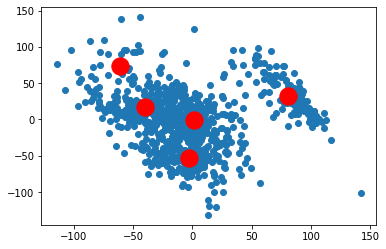

In [54]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_pca_with_2)
plt.scatter(X_pca_with_2[:,0], X_pca_with_2[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

## KMEANS Clustering with PCA = .995

In [55]:
from sklearn.cluster import KMeans
clusters_995 = KMeans(5, n_init = 5)
clusters_995.fit(X_pca_with_995)
clusters_995.labels_

array([2, 4, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 4, 1, 1, 2, 0, 1,
       4, 0, 1, 4, 3, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 4, 0, 0, 1, 2, 2, 1,
       1, 0, 2, 3, 0, 4, 0, 4, 0, 2, 3, 0, 0, 3, 1, 0, 4, 0, 0, 4, 2, 3,
       0, 2, 1, 0, 1, 0, 0, 4, 0, 4, 0, 1, 2, 3, 0, 2, 0, 0, 2, 2, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 2, 3, 0, 2, 0, 0, 1, 0, 1, 4, 1, 4, 3, 4, 4,
       2, 0, 4, 2, 0, 1, 1, 1, 0, 0, 4, 1, 4, 0, 2, 2, 2, 0, 1, 0, 3, 0,
       3, 0, 0, 1, 4, 0, 1, 3, 0, 2, 0, 1, 4, 3, 2, 0, 4, 4, 4, 4, 0, 0,
       4, 0, 0, 2, 2, 4, 2, 4, 1, 0, 2, 4, 3, 1, 4, 0, 1, 4, 0, 4, 0, 0,
       0, 2, 0, 1, 3, 1, 0, 2, 2, 2, 4, 4, 0, 4, 4, 1, 4, 2, 4, 0, 0, 0,
       4, 4, 0, 1, 1, 1, 1, 2, 0, 2, 0, 4, 4, 0, 2, 0, 2, 0, 0, 0, 4, 0,
       1, 4, 1, 1, 4, 0, 1, 2, 0, 4, 4, 2, 3, 0, 1, 2, 1, 3, 0, 1, 1, 4,
       2, 2, 4, 4, 1, 0, 0, 3, 0, 2, 3, 0, 2, 1, 2, 2, 2, 0, 3, 3, 4, 3,
       3, 2, 4, 0, 0, 1, 1, 0, 3, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 4, 4, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 4, 2, 0,

In [56]:
pca_with_995_data_frame = pd.DataFrame(data=X_pca_with_995)
pca_with_995_data_frame.head()
pca_with_995_data_frame['Cls_label'] = clusters.labels_
pca_with_995_data_frame['given_cancer_type'] = label.Class.values

In [57]:
pca_with_995_data_frame.shape

(801, 749)

In [58]:
brca_995 = pca_with_995_data_frame.groupby('given_cancer_type').get_group('BRCA')
brca_995.Cls_label.value_counts()

2    202
3     44
0     35
4     19
Name: Cls_label, dtype: int64

In [59]:
luad_995 = pca_with_995_data_frame.groupby('given_cancer_type').get_group('LUAD')
luad_995.Cls_label.value_counts()

3    99
0    23
2    13
4     5
1     1
Name: Cls_label, dtype: int64

In [60]:
coad_995 = pca_with_995_data_frame.groupby('given_cancer_type').get_group('COAD')
coad_995.Cls_label.value_counts()

0    61
4     9
3     8
Name: Cls_label, dtype: int64

In [61]:
prad_995 = pca_with_995_data_frame.groupby('given_cancer_type').get_group('PRAD')
prad_995.Cls_label.value_counts()

3    60
0    46
2    17
4    13
Name: Cls_label, dtype: int64

In [62]:
kirc_995 = pca_with_995_data_frame.groupby('given_cancer_type').get_group('KIRC')
kirc_995.Cls_label.value_counts()

1    138
3      7
4      1
Name: Cls_label, dtype: int64

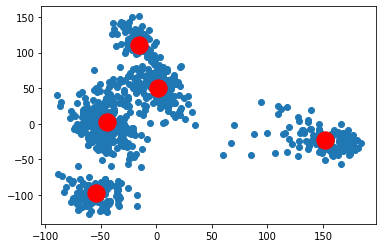

In [63]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_pca_with_995)
plt.scatter(X_pca_with_995[:,0], X_pca_with_995[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

## Week 4: Build Classification Models

#### Project Task: Week 4: 

Building Classification Model(s) with Feature Selection:

Our final task is to build a robust classification model(s) for identifying each type of cancer.

Sub-tasks:

Build a classification model(s) using multiclass SVM, Random Forest, and Deep Neural Network to classify the input data into five cancer types

Apply the feature selection algorithms, forward selection, and backward elimination to refine selected attributes (selected in Task-2) using the classification model from the previous step

Validate the genes selected from the last step using statistical significance testing (t-test for one vs. all and F-test)
 

### Build decision tree clasifier

#### Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions, similarly to how humans make decisions. One way to think of a Machine Learning classification algorithm is that it is built to make decisions. You usually say the model predicts the class of the new, never-seen-before input but, behind the scenes, the algorithm has to decide which class to assign.


In [64]:
ml_x = x_lda
ml_y = y_lda
ml_x.shape,ml_y.shape
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ml_x,ml_y,test_size=0.30,random_state=30)

In [65]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train,y_train)
dt_clf.score(x_test,y_test)

y_pred=(dt_clf.predict(x_test))
dt_clf.score(x_test,y_test)

0.9585062240663901

### SVM 

#### Support vector machine algorithm is used to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
sv_clf = SVC(probability=True, kernel='linear')
sv_clf.fit(x_train,y_train)
sv_clf.score(x_test,y_test)


y_pred = sv_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))


1.0


### Random Forest 

#### Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is: A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

In [67]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
rf_clf.score(x_test,y_test)

0.9875518672199171

### Naive Bayes Classifier 

#### A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

#### Bayes Theorem:

#### Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

In [68]:
from sklearn.naive_bayes import GaussianNB
gb_clf = GaussianNB()
gb_clf.fit(x_train,y_train)
gb_clf.score(x_test,y_test)

0.7385892116182573

gb_clf = ensemble.GradientBoostingClassifier(n_estimators=40)
gb_clf.fit(x_train,y_train)
gb_clf.score(x_test,y_test)

### KNN Classifier

#### K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train,y_train)
knn_clf.score(x_test,y_test)

0.995850622406639

## Recurcive Feature Elimination 

In [70]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.027)


## One way F test 

In [71]:
df_tsne = pd.DataFrame(data=tnse_features,columns=['tsne1','tsne2'])
df_tsne['cancer_type']=label['Class']
df_tsne

,tsne1,tsne2,cancer_type
0,35.810390,0.705806,PRAD
1,-19.795588,24.284504,LUAD
2,48.298653,-1.458622,PRAD
3,47.529713,-1.101577,PRAD
4,4.113177,1.079581,BRCA
...,...,...,...
796,2.207560,-0.609111,BRCA
797,-31.377716,21.698442,LUAD
798,-29.307745,-2.164104,COAD
799,41.049381,0.451809,PRAD


In [72]:
df_anova_tsne = df_tsne[['tsne2','cancer_type']]
grps_tsne = pd.unique(df_anova_tsne.cancer_type.values)

d_data = {grp:df_anova_tsne['tsne2'][df_anova_tsne.cancer_type == grp] for grp in grps_tsne}

F, p = stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


In [73]:
df_anova_tsne = df_tsne[['tsne1','cancer_type']]
grps_tsne = pd.unique(df_anova_tsne.cancer_type.values)

d_data = {grp:df_anova_tsne['tsne1'][df_anova_tsne.cancer_type == grp] for grp in grps_tsne}

F, p = stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


## DNN 

The neural network needs to learn all the time to solve tasks in a more qualified manner or even to use various methods to provide a better result. When it gets new information in the system, it learns how to act accordingly to a new situation.

Learning becomes deeper when tasks you solve get harder. Deep neural network represents the type of machine learning when the system uses many layers of nodes to derive high-level functions from input information. It means transforming the data into a more creative and abstract component.

In order to understand the result of deep learning better, let's imagine a picture of an average man. Although you have never seen this picture and his face and body before, you will always identify that it is a human and differentiate it from other creatures. This is an example of how the deep neural network works. Creative and analytical components of information are analyzed and grouped to ensure that the object is identified correctly. These components are not brought to the system directly, thus the ML system has to modify and derive them. 

In [74]:
features=master_data.drop(['Unnamed: 0'],axis=1)
features=features.drop(['Class'],axis=1)
target=master_data['Class']
features.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [75]:
target.head()

0    1
1    2
2    1
3    1
4    3
Name: Class, dtype: int64

In [76]:
f1=features.values

In [77]:
y1 = pd.get_dummies(y_lda)

In [78]:
from sklearn.model_selection import train_test_split

#y1 = pd.get_dummies(Xg_fea.Pos_Neg)

X1_train, X1_valid, y1_train, y1_valid = train_test_split(f1,y1, test_size = 0.10, random_state=42)

In [79]:
X1_train.shape,X1_valid.shape,y1_valid.shape,y1_train.shape

((720, 20531), (81, 20531), (81, 5), (720, 5))

### Define the model 

#### The ReLU function is f(x)=max(0,x). Usually this is applied element-wise to the output of some other function, such as a matrix-vector product. In MLP usages, rectifier units replace all other activation functions except perhaps the readout layer. But I suppose you could mix-and-match them if you'd like. One way ReLUs improve neural networks is by speeding up training. The gradient computation is very simple (either 0 or 1 depending on the sign of x). Also, the computational step of a ReLU is easy: any negative elements are set to 0.0 -- no exponentials, no multiplication or division operations. Gradients of logistic and hyperbolic tangent networks are smaller than the positive portion of the ReLU. This means that the positive portion is updated more rapidly as training progresses. However, this comes at a cost. The 0 gradient on the left-hand side is has its own problem, called "dead neurons," in which a gradient update sets the incoming values to a ReLU such that the output is always zero; modified ReLU units such as ELU (or Leaky ReLU etc.) can minimize this. Source : StackExchange

#### Optimizer is chosen SGD



In [80]:
import tensorflow as tf

In [81]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#adding layers of inout
model.add(tf.keras.layers.Dense(10000, input_dim=20531, activation='relu', kernel_initializer='he_uniform'))


#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(5000, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(2000, activation='relu'))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(1000, activation='relu'))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(500, activation='relu'))

#Add 5th hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 6th hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10000)             205320000 
_________________________________________________________________
batch_normalization (BatchNo (None, 10000)             40000     
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              50005000  
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              10002000  
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_4 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_5 (Dense)              (None, 200)               1

In [83]:
history = model.fit(X1_train,y1_train,          
          validation_data=(X1_valid,y1_valid),
          epochs=5,
          batch_size=32)

2021-12-10 16:08:29.884626: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
23/23 [==============================] - 16s 641ms/step - loss: 0.3033 - accuracy: 0.9208 - val_loss: 6.4264 - val_accuracy: 0.3951
Epoch 2/5
23/23 [==============================] - 14s 596ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 2.5350 - val_accuracy: 0.6914
Epoch 3/5
23/23 [==============================] - 14s 594ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.0763 - val_accuracy: 0.7531
Epoch 4/5
23/23 [==============================] - 14s 604ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.2501 - val_accuracy: 0.8519
Epoch 5/5
23/23 [==============================] - 14s 592ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000


In [84]:
xyz = model.predict(X1_valid)

In [85]:
y_pr=[]
for k in xyz:
    #np.argmax(k)
    #print(np.argmax(k))
    y_pr.append(np.argmax(k))
    
y_val=[]
for k in y1_valid.values:
    #np.argmax(k)
    #print(np.argmax(k))
    y_val.append(np.argmax(k))

In [86]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pr)

array([[14,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  0, 31,  0,  0],
       [ 0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  7]])

### Evaluvate the model 

In [87]:
_, train_acc = model.evaluate(X1_train, y1_train, verbose=0)
_, test_acc = model.evaluate(X1_valid, y1_valid, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.982, Test: 1.000


### Plot History 

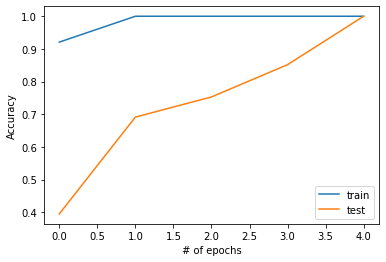

In [88]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('# of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()